## Plot a Hubble diagram
version 31 Dec 2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# requirements
## corner: pip install corner
## emcee: pip install emcee
from linear_mcmc import *

## Helper function for plotting

In [2]:
# Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  

        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 

        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        # Set font size for x-axis and y-axis tick labels
        for tick in ax.get_xticklabels():
            tick.set_fontsize(fontsize)
        for tick in ax.get_yticklabels():
            tick.set_fontsize(fontsize) 
        
        return x_ax, y_ax

# Import Data

In [3]:
# To convert from DECam g-z to ACS g-z, use the scale factor and offset:
a = 1.042
b = -0.012
sigma = 0.018
x = 0
shift = 0

In [3]:
# Define the path to your CSV file
csv_file_path = '/Users/Joe/Desktop/AAS2025/IRSBF-H0-newplotdata.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df

,name,distance,distancesig,CMBvel,gVcmb,Grpvel,velsig,dust/spiral,Ttype,H0(old),sig,SNhost,B2021flag
0,NGC0057,64.94,3.4700,5088.0,5208.0,5278.0,330.000,43.0,43.0,78.93,5.63,0.0,1.0
1,NGC0315,68.07,2.9000,4635.0,4760.0,4819.0,312.000,40.0,43.0,70.72,5.09,0.0,1.0
2,NGC0383,66.04,3.1700,4802.0,4838.0,4900.0,306.000,43.0,40.0,74.16,5.31,0.0,1.0
3,NGC0410,61.81,2.7800,5002.0,4838.0,4900.0,306.000,40.0,43.0,79.95,5.62,0.0,1.0
4,NGC0495,54.55,2.5700,3831.0,4575.0,4626.0,306.000,40.0,40.0,71.68,5.13,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,N4415,17.99,0.8900,1241.0,1484.0,0.0,300.000,30.0,30.0,0.00,0.00,1.0,0.0
104,N5018,35.98,1.6400,3131.0,3095.0,0.0,300.000,30.0,30.0,0.00,0.00,1.0,0.0
105,N5304,59.52,3.1000,3986.0,4867.0,0.0,300.000,30.0,30.0,0.00,0.00,1.0,0.0
106,E479-G007,67.68,7.4500,4896.0,5578.0,0.0,300.000,30.0,30.0,0.00,0.00,1.0,0.0


In [14]:
# Hubble plot (group cmb velocities)

df = pd.read_csv(csv_file_path)
df = df[["gVcmb","velsig","distance","distancesig","B2021flag"]].dropna()
        
x = df.distance.values
y = df.gVcmb.values
xerr = df.distancesig.values
yerr = df.velsig.values
flag = df.B2021flag.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/Desktop/AAS2025/Hubble_gVcmb_15Jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'SBF distance (Mpc)'
ylabel=r'group CMB velocity (km/s)'

xold = x * flag
xnew = x * (-1*flag+1)
yold = y * flag
ynew = y * (-1*flag+1)

Mold, Bold, samples = linMC(xold, yold, xerr, yerr, nsteps=1000)
Mnew, Bnew, samples = linMC(xnew, ynew, xerr, yerr, nsteps=1000)
print(' ')
print(f"Slope old (m): {Mold[0]:.3f} +{Mold[1]:.3f} -{Mold[2]:.3f}")
print(f"Intercept (b): {Bold[0]:.3f} +{Bold[1]:.3f} -{Bold[2]:.3f}")
print(' ')
print(f"Slope new (m): {Mnew[0]:.3f} +{Mnew[1]:.3f} -{Mnew[2]:.3f}")
print(f"Intercept (b): {Bnew[0]:.3f} +{Bnew[1]:.3f} -{Bnew[2]:.3f}")


Slope (m): 74.221 +0.644 -0.651
Intercept (b): 0.000 +0.007 -0.007
 
Slope old (m): 72.365 +0.824 -0.806
Intercept (b): -0.000 +0.007 -0.007
 
Slope new (m): 76.551 +1.077 -1.034
Intercept (b): -0.000 +0.008 -0.008


In [12]:
# Hubble plot (individual v_cmb)

df = pd.read_csv(csv_file_path)
df = df[["CMBvel","velsig","distance","distancesig","B2021flag"]].dropna()
        
x = df.distance.values
y = df.CMBvel.values
xerr = df.distancesig.values
yerr = df.velsig.values
flag = df.B2021flag.values

M , B, samples = linMC(x, y, xerr, yerr, nsteps=1000)

print(f"Slope (m): {M[0]:.3f} +{M[1]:.3f} -{M[2]:.3f}")
print(f"Intercept (b): {B[0]:.3f} +{B[1]:.3f} -{B[2]:.3f}")

outfile = "/Users/Joe/Desktop/AAS2025/Hubble_14jan2025.pdf"
figtitle = " "
legend = True
xlabel=r'SBF distance (Mpc)'
ylabel=r'CMB $cz$ (km/s)'

xold = x * flag
xnew = x * (-1*flag+1)
yold = y * flag
ynew = y * (-1*flag+1)

Mold, Bold, samples = linMC(xold, yold, xerr, yerr, nsteps=1000)
Mnew, Bnew, samples = linMC(xnew, ynew, xerr, yerr, nsteps=1000)
print(' ')
print(f"Slope old (m): {Mold[0]:.3f} +{Mold[1]:.3f} -{Mold[2]:.3f}")
print(f"Intercept (b): {Bold[0]:.3f} +{Bold[1]:.3f} -{Bold[2]:.3f}")
print(' ')
print(f"Slope new (m): {Mnew[0]:.3f} +{Mnew[1]:.3f} -{Mnew[2]:.3f}")
print(f"Intercept (b): {Bnew[0]:.3f} +{Bnew[1]:.3f} -{Bnew[2]:.3f}")


Slope (m): 73.758 +0.648 -0.640
Intercept (b): 0.000 +0.007 -0.007
 
Slope old (m): 72.399 +0.816 -0.812
Intercept (b): 0.000 +0.007 -0.007
 
Slope new (m): 75.378 +1.094 -1.073
Intercept (b): -0.000 +0.008 -0.007


# Plot

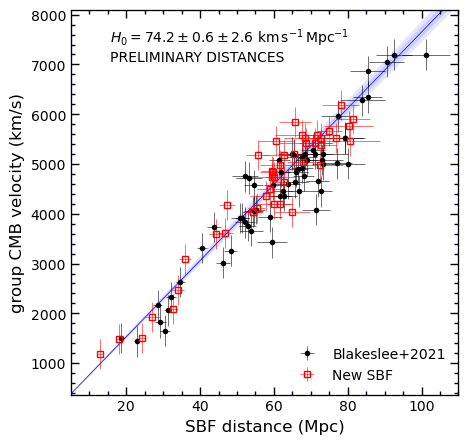

In [15]:
size = 600

mn = np.min(x)
mx = np.max(x)
R = mx - mn
xl = np.linspace(mn-0.1*R, mx+0.1*R, 100)

N = len(xl)
Y = np.ones(shape = (size,N))
i = 0 
for m, b, in samples[np.random.randint(len(samples), size=size)]:
    Y[i] = m*xl+b
    i+=1

# Compute percentiles
percentiles = np.percentile(Y, [16, 50, 84], axis=0)
yl = percentiles[1]
yue = percentiles[2] - percentiles[1]
yle = percentiles[1] - percentiles[0]

fig, ax = plt.subplots(figsize=(5, 5))

# Plotting with error bars and filling between percentiles
ax.fill_between(xl, yl + 2 * yue, yl - 2 * yle, color='b', alpha=0.1, edgecolor="none")
ax.fill_between(xl, yl + yue, yl - yle, color='b', alpha=0.1, edgecolor="none")
ax.plot(xl, yl, color='b', linewidth=0.5)

ax.errorbar(xold, yold, xerr=xerr, yerr=yerr, fmt="k", capsize=0, linewidth=0.4, elinewidth=0.4, linestyle='none', marker='o', markersize=3, markerfacecolor='k', label='Blakeslee+2021')
ax.errorbar(xnew, ynew, xerr=xerr, yerr=yerr, fmt="r", capsize=0, linewidth=0.4, elinewidth=0.4, linestyle='none', marker='s', markersize=4, markerfacecolor='none', label='New SBF')

ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)
ax.set_xlim(5,110)
ax.set_ylim(368,8102)

textstr = ""
if legend==True:
    textstr = '\n'.join((
        figtitle,
        r'$H_0={0:.1f} \pm {1:.1f}\pm 2.6\,\, {{\rm km\,s}}^{{-1}}\,{{\rm Mpc}}^{{-1}}$'.format(M[0], (M[1]+M[2])/2.), 'PRELIMINARY DISTANCES'
    ))

# Define the position of the text annotation
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.1, 1, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top') #, bbox=props)


_= set_axes(ax, fontsize=10)

ax.legend(loc='lower right', frameon=False)
plt.savefig(outfile, format='pdf', bbox_inches='tight')
plt.show()

In [19]:
## To read the docstring of linMC, uncomment the following line
# linMC?